<a href="https://colab.research.google.com/github/alliarnold/data71200su24/blob/allibranch/projectfiles/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1

### Step 1: Select Data Source

**Source:** Open Data NYC--Hyperlocal Temperature Monitoring\
**Filtering:** Just Brooklyn 2019 dataset\
**About:** The filtered data includes features for temperature, hour of the day [0-23], date, lat, long, source [street light monitor or tree monitor]. I am also adding a calculated column for heat safety warning based on the temperature column.\
**Source URL:** [Access filtered link here.](https://data.cityofnewyork.us/dataset/Hyperlocal-Temperature-Monitoring/qdq3-9eqn/explore/query/SELECT%20%60airtemp%60%2C%20%60day%60%2C%20%60hour%60%2C%20%60latitude%60%2C%20%60longitude%60%2C%20%60install_type%60%0AWHERE%0A%20%20caseless_one_of%28%60year%60%2C%20%222019%22%29%0A%20%20AND%20caseless_one_of%28%60borough%60%2C%20%22Brooklyn%22%29/page/filter)\
**Github Source:** Due to the size of the data set, it is saved in two csv files the project folder of my Github branch.


In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix

In [2]:
!pip install -U scikit-learn==1.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 15.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


I made sure to use "parse-dates" when creating the dataframes on the "Day" column to make sure the correct datatype was set.

In [4]:
df1 = pd.read_csv('/content/drive/My Drive/GC-CUNY/2024_Summer/BK2-019-Temp-Monitor-pt1.csv', parse_dates=[1])

In [5]:
df2 = pd.read_csv('/content/drive/My Drive/GC-CUNY/2024_Summer/BK2-019-Temp-Monitor-pt2.csv', parse_dates=[1])

In [6]:
tempdf = pd.concat([df1, df2])

In [7]:
tempdf.head()

,AirTemp,Day,Hour,Latitude,Longitude,Install.Type
0,73.942167,2019-08-09,7,40.666205,-73.91691,Street Tree
1,76.666333,2019-08-09,8,40.666205,-73.91691,Street Tree
2,78.691333,2019-08-09,9,40.666205,-73.91691,Street Tree
3,81.472500,2019-08-09,10,40.666205,-73.91691,Street Tree
4,83.571667,2019-08-09,11,40.666205,-73.91691,Street Tree


In [8]:
tempdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 477576 entries, 0 to 135576
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   AirTemp       471649 non-null  float64       
 1   Day           477576 non-null  datetime64[ns]
 2   Hour          477576 non-null  int64         
 3   Latitude      477576 non-null  float64       
 4   Longitude     477576 non-null  float64       
 5   Install.Type  477576 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 25.5+ MB


I went back and forth on whether or not to change the 'Hour' column to an object, because the hours are more of an ordinal category than a numerical feature. Ultimately, I decided not to set the data type as object so that I could more easily call the orders of the hours, but I will need to remember not to run certain calculations on it.

In [ ]:
# tempdf['Hour'] = tempdf['Hour'].astype(object)

I added a column with heat advisory levels based on the outside temperature.

In [9]:
conditions = [
    (tempdf['AirTemp'] < 80),
    (tempdf['AirTemp'] >= 80) & (tempdf['AirTemp'] < 90),
    (tempdf['AirTemp'] >= 90) & (tempdf['AirTemp'] < 103),
    (tempdf['AirTemp'] >= 103) & (tempdf['AirTemp'] < 124),
    (tempdf['AirTemp'] >= 124)
    ]

# create a list of the values we want to assign for each condition
values = ['Normal', 'Caution', 'Extreme_Caution', 'Danger', 'Extreme_Danger']

# create a new column and use np.select to assign values to it using our lists as arguments

tempdf['Advisory'] = np.select(conditions, values)

# display updated DataFrame
tempdf.head()

,AirTemp,Day,Hour,Latitude,Longitude,Install.Type,Advisory
0,73.942167,2019-08-09,7,40.666205,-73.91691,Street Tree,Normal
1,76.666333,2019-08-09,8,40.666205,-73.91691,Street Tree,Normal
2,78.691333,2019-08-09,9,40.666205,-73.91691,Street Tree,Normal
3,81.472500,2019-08-09,10,40.666205,-73.91691,Street Tree,Caution
4,83.571667,2019-08-09,11,40.666205,-73.91691,Street Tree,Caution


### Step 2:

Here I briefly separated my data into a targete class and the other data, as well as the test and training data.

In [32]:
from sklearn.model_selection import train_test_split

In [56]:
y_target = tempdf['Advisory']
print(y_target)

0          Normal
1          Normal
2          Normal
3         Caution
4         Caution
           ...   
135572     Normal
135573     Normal
135574     Normal
135575    Caution
135576    Caution
Name: Advisory, Length: 477576, dtype: object


In [57]:
x_data = tempdf.drop(['Advisory'], axis=1)
print(x_data)

          AirTemp        Day  Hour   Latitude  Longitude Install.Type
0       73.942167 2019-08-09     7  40.666205 -73.916910  Street Tree
1       76.666333 2019-08-09     8  40.666205 -73.916910  Street Tree
2       78.691333 2019-08-09     9  40.666205 -73.916910  Street Tree
3       81.472500 2019-08-09    10  40.666205 -73.916910  Street Tree
4       83.571667 2019-08-09    11  40.666205 -73.916910  Street Tree
...           ...        ...   ...        ...        ...          ...
135572  74.705333 2019-07-15     7  40.682379 -73.931414   Light Pole
135573  76.107833 2019-07-15     8  40.682379 -73.931414   Light Pole
135574  77.990333 2019-07-15     9  40.682379 -73.931414   Light Pole
135575  81.616167 2019-07-15    10  40.682379 -73.931414   Light Pole
135576  84.669833 2019-07-15    11  40.682379 -73.931414   Light Pole

[477576 rows x 6 columns]


In [58]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_target, random_state=0, stratify=None)

### Step 3:

Explore your training set.

In [59]:
X_train.describe()

,AirTemp,Day,Hour,Latitude,Longitude
count,353842.000000,358182,358182.000000,358182.000000,358182.000000
mean,75.672800,2019-08-14 23:08:22.276496384,11.491990,40.667502,-73.927265
min,46.031000,2019-06-15 00:00:00,0.000000,40.646738,-73.998978
25%,70.150833,2019-07-15 00:00:00,5.000000,40.660060,-73.945583
50%,75.659333,2019-08-15 00:00:00,11.000000,40.666487,-73.925768
75%,81.472333,2019-09-15 00:00:00,17.000000,40.679143,-73.907185
max,111.546500,2019-10-15 00:00:00,23.000000,40.686464,-73.887402
std,8.967774,NaN,6.917393,0.012040,0.028421


In [60]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 358182 entries, 315900 to 119485
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   AirTemp       353842 non-null  float64       
 1   Day           358182 non-null  datetime64[ns]
 2   Hour          358182 non-null  int64         
 3   Latitude      358182 non-null  float64       
 4   Longitude     358182 non-null  float64       
 5   Install.Type  358182 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 19.1+ MB


In [61]:
y_train.describe()

count     358182
unique         5
top       Normal
freq      247489
Name: Advisory, dtype: object

In [62]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 358182 entries, 315900 to 119485
Series name: Advisory
Non-Null Count   Dtype 
--------------   ----- 
358182 non-null  object
dtypes: object(1)
memory usage: 5.5+ MB


### Step 4:

Data cleaning. For this step I found that a number of my rows were marked as NaN for the target data, in this case the air temperature. I considered dropping those cases, since I still had plenty of data, or setting them as a mean value.

In [63]:
nan_Xcount = X_train.isna().sum()

print(nan_Xcount)

AirTemp         4340
Day                0
Hour               0
Latitude           0
Longitude          0
Install.Type       0
dtype: int64


Before deciding if I should use the median or mean value for the replacement value, I first checked to see if the data was normally distributed. It looked pretty normal, so I chose to use the mean.

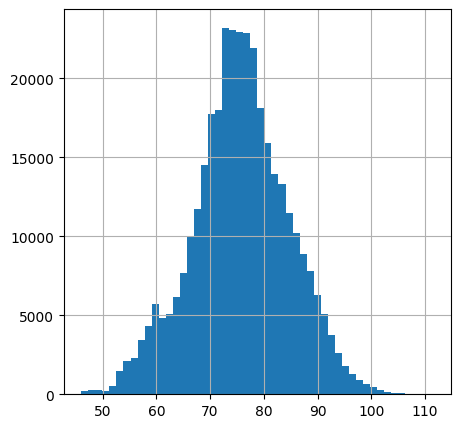

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
X_train['AirTemp'].hist(bins=50, figsize=(5,5))
plt.show()

In [72]:
# adding new columns with the na's replaced with the mean value for air temp

X_train['AirTemp_Mean'] = X_train['AirTemp'].fillna(X_train['AirTemp'].mean())
print(X_train.head())

          AirTemp        Day  Hour   Latitude  Longitude Install.Type  \
315900  72.544667 2019-09-20    21  40.682073 -73.931813  Street Tree   
126541  79.165500 2019-08-18     9  40.663420 -73.906938  Street Tree   
300052  86.633333 2019-07-21     2  40.678215 -73.983136   Light Pole   
50364   75.970333 2019-06-30     1  40.659592 -73.912133  Street Tree   
56966   66.029500 2019-10-14    20  40.665650 -73.912600   Light Pole   

        AirTemp_Mean  
315900     72.544667  
126541     79.165500  
300052     86.633333  
50364      75.970333  
56966      66.029500  


In [74]:
X_train_new = X_train.drop(['AirTemp'], axis=1)
print(X_train_new.head())

              Day  Hour   Latitude  Longitude Install.Type  AirTemp_Mean
315900 2019-09-20    21  40.682073 -73.931813  Street Tree     72.544667
126541 2019-08-18     9  40.663420 -73.906938  Street Tree     79.165500
300052 2019-07-21     2  40.678215 -73.983136   Light Pole     86.633333
50364  2019-06-30     1  40.659592 -73.912133  Street Tree     75.970333
56966  2019-10-14    20  40.665650 -73.912600   Light Pole     66.029500


In [75]:
X_test['AirTemp_Mean'] = X_test['AirTemp'].fillna(X_test['AirTemp'].mean())
print(X_test.head())

          AirTemp        Day  Hour   Latitude  Longitude Install.Type  \
68462   74.849667 2019-09-24     2  40.686012 -73.925768  Street Tree   
78332   72.710667 2019-08-27    17  40.651562 -73.947778  Street Tree   
29494   70.508333 2019-09-04     4  40.664301 -73.916268  Street Tree   
121146  65.031000 2019-09-08     6  40.663994 -73.906047   Light Pole   
312386  70.916167 2019-08-28     7  40.681566 -73.932815  Street Tree   

        AirTemp_Mean  
68462      74.849667  
78332      72.710667  
29494      70.508333  
121146     65.031000  
312386     70.916167  


In [76]:
X_test_new = X_test.drop(['AirTemp'], axis=1)
print(X_test_new.head())

              Day  Hour   Latitude  Longitude Install.Type  AirTemp_Mean
68462  2019-09-24     2  40.686012 -73.925768  Street Tree     74.849667
78332  2019-08-27    17  40.651562 -73.947778  Street Tree     72.710667
29494  2019-09-04     4  40.664301 -73.916268  Street Tree     70.508333
121146 2019-09-08     6  40.663994 -73.906047   Light Pole     65.031000
312386 2019-08-28     7  40.681566 -73.932815  Street Tree     70.916167


### Step 5:

This step was to visualize my training data set.

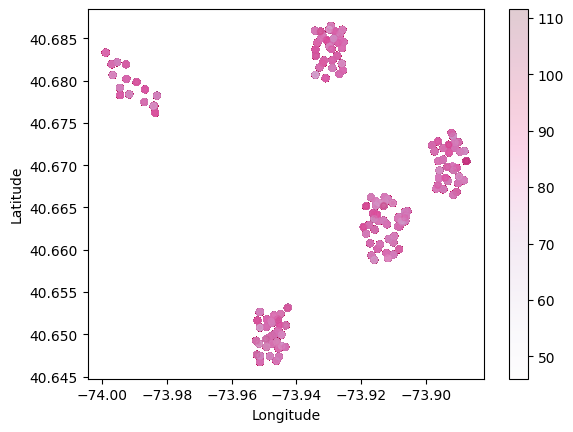

In [81]:
X_train_new.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.2, c=X_train_new['AirTemp_Mean'], cmap=plt.get_cmap("PuRd"), colorbar=True)
plt.show()

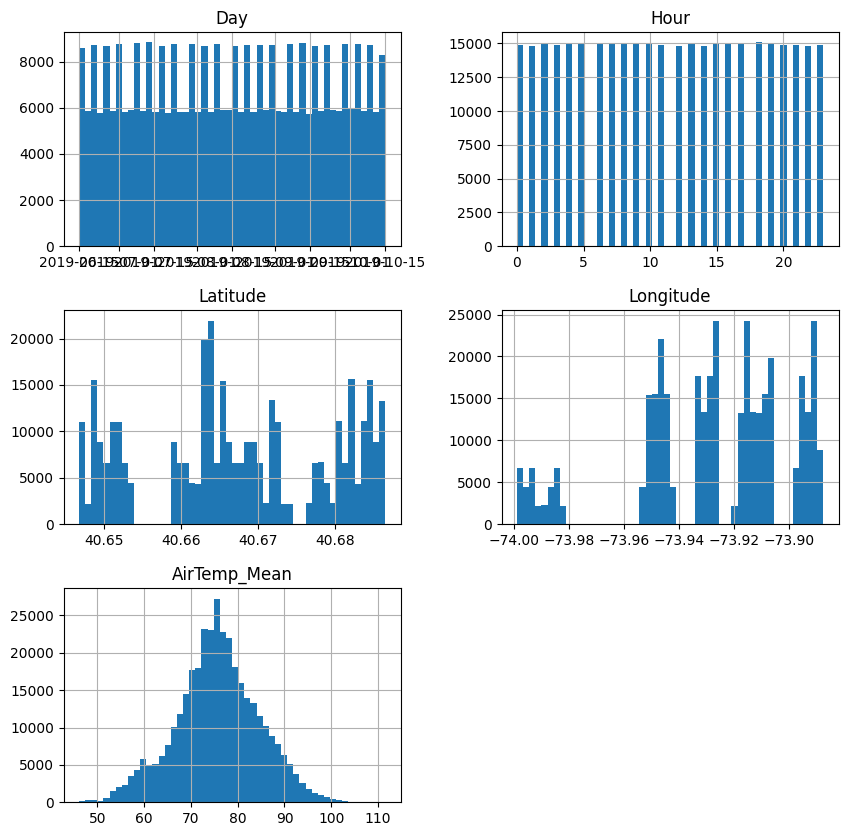

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt
X_train_new.hist(bins=50, figsize=(10,10))
plt.show()

array([[<Axes: xlabel='AirTemp_Mean', ylabel='AirTemp_Mean'>,
        <Axes: xlabel='Hour', ylabel='AirTemp_Mean'>,
        <Axes: xlabel='Longitude', ylabel='AirTemp_Mean'>,
        <Axes: xlabel='Latitude', ylabel='AirTemp_Mean'>],
       [<Axes: xlabel='AirTemp_Mean', ylabel='Hour'>,
        <Axes: xlabel='Hour', ylabel='Hour'>,
        <Axes: xlabel='Longitude', ylabel='Hour'>,
        <Axes: xlabel='Latitude', ylabel='Hour'>],
       [<Axes: xlabel='AirTemp_Mean', ylabel='Longitude'>,
        <Axes: xlabel='Hour', ylabel='Longitude'>,
        <Axes: xlabel='Longitude', ylabel='Longitude'>,
        <Axes: xlabel='Latitude', ylabel='Longitude'>],
       [<Axes: xlabel='AirTemp_Mean', ylabel='Latitude'>,
        <Axes: xlabel='Hour', ylabel='Latitude'>,
        <Axes: xlabel='Longitude', ylabel='Latitude'>,
        <Axes: xlabel='Latitude', ylabel='Latitude'>]], dtype=object)

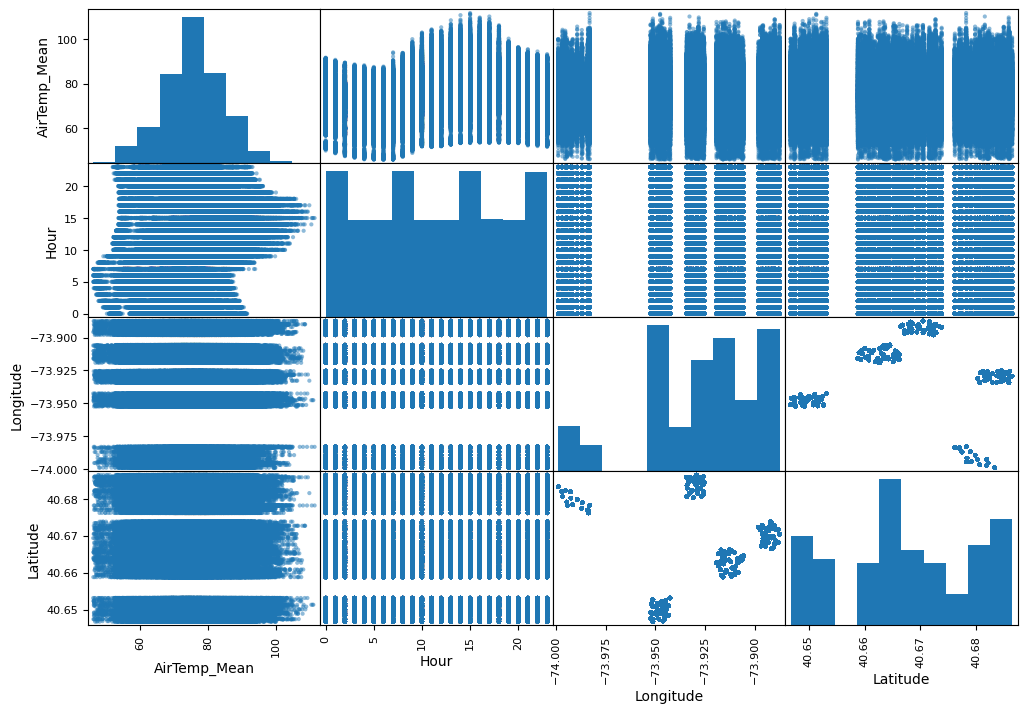

In [91]:
#scatter matrix

attributes = ["AirTemp_Mean", "Hour", "Longitude", 'Latitude']
scatter_matrix(X_train_new[attributes], figsize=(12, 8))

###Step 6:

Here was a moment to apply transformations.

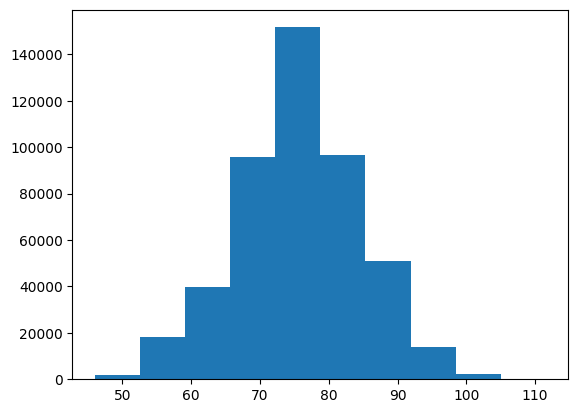

In [83]:
plt.hist(tempdf['AirTemp'].values.reshape(-1, 1), bins=10)
plt.show()

In [86]:
from sklearn.preprocessing import KBinsDiscretizer
kb = KBinsDiscretizer(n_bins=10, strategy='uniform')
kb.fit(X_train_new['AirTemp_Mean'].values.reshape(-1, 1))
print("bin edges: \n", kb.bin_edges_)

bin edges: 
 [array([ 46.031  ,  52.58255,  59.1341 ,  65.68565,  72.2372 ,  78.78875,
         85.3403 ,  91.89185,  98.4434 , 104.99495, 111.5465 ])          ]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [88]:
binned = kb.transform(X_train_new['AirTemp_Mean'].values.reshape(-1, 1))
binned

<358182x10 sparse matrix of type '<class 'numpy.float64'>'
	with 358182 stored elements in Compressed Sparse Row format>

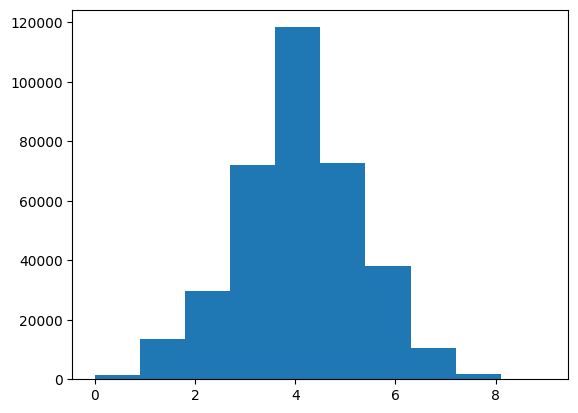

In [89]:
plt.hist(binned.argmax(1))
plt.show()

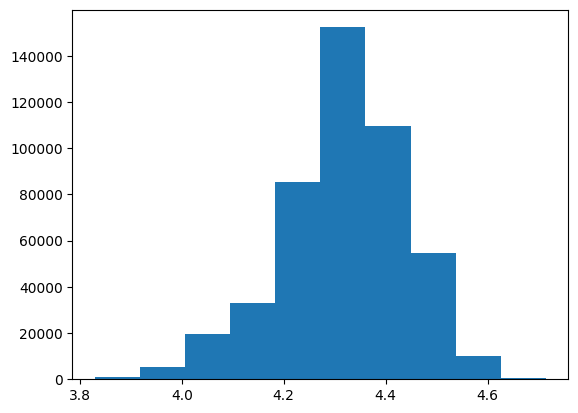

In [90]:
plt.hist(np.log(tempdf['AirTemp'].values.reshape(-1, 1)), bins=10)
plt.show()

array([[<Axes: xlabel='AirTemp_Mean', ylabel='AirTemp_Mean'>,
        <Axes: xlabel='Hour', ylabel='AirTemp_Mean'>,
        <Axes: xlabel='Longitude', ylabel='AirTemp_Mean'>,
        <Axes: xlabel='Latitude', ylabel='AirTemp_Mean'>],
       [<Axes: xlabel='AirTemp_Mean', ylabel='Hour'>,
        <Axes: xlabel='Hour', ylabel='Hour'>,
        <Axes: xlabel='Longitude', ylabel='Hour'>,
        <Axes: xlabel='Latitude', ylabel='Hour'>],
       [<Axes: xlabel='AirTemp_Mean', ylabel='Longitude'>,
        <Axes: xlabel='Hour', ylabel='Longitude'>,
        <Axes: xlabel='Longitude', ylabel='Longitude'>,
        <Axes: xlabel='Latitude', ylabel='Longitude'>],
       [<Axes: xlabel='AirTemp_Mean', ylabel='Latitude'>,
        <Axes: xlabel='Hour', ylabel='Latitude'>,
        <Axes: xlabel='Longitude', ylabel='Latitude'>,
        <Axes: xlabel='Latitude', ylabel='Latitude'>]], dtype=object)

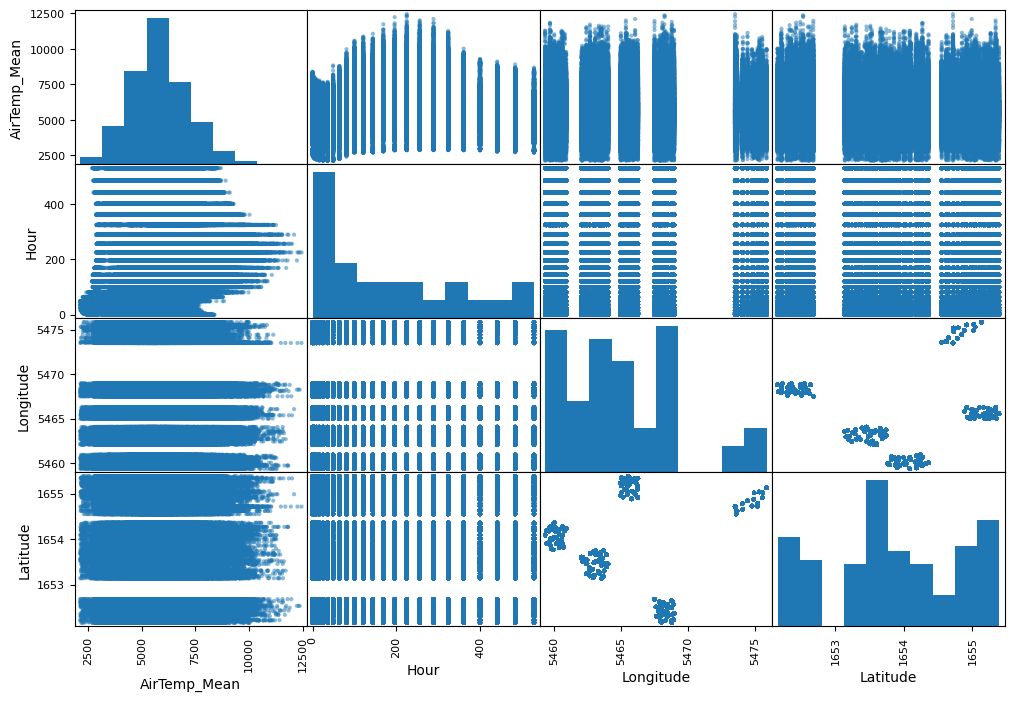

In [92]:
#scatter matrix exponential

attributes = ["AirTemp_Mean", "Hour", "Longitude", 'Latitude']
scatter_matrix(X_train_new[attributes]**2, figsize=(12, 8))